<a href="https://colab.research.google.com/github/Axemazon/Finanzas/blob/main/Portafolio_Cliente_Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import cvxpy as cp

# Descargar datos de precios de cierre ajustados de acciones
tickers = ['AAPL', 'KO', 'NFLX', 'META', 'BRK-B','NVDA']
data = yf.download(tickers, start='2022-01-10', end='2024-01-10')['Adj Close']

# Calcular rendimientos diarios
returns = np.log(data / data.shift(1)).dropna()

# Número de activos
num_assets = len(tickers)

# Variables de ponderación (a optimizar)
weights = cp.Variable(num_assets)

# Covarianza de los rendimientos
cov_matrix = np.cov(returns, rowvar=False)

# Rendimiento esperado
expected_return = cp.sum(cp.multiply(weights, returns.mean()))

# Volatilidad (varianza) del portafolio
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Reformulación de la función objetivo
objective = cp.Minimize(portfolio_variance)

# Restricciones de la optimización
constraints = [
    cp.sum(weights) == 1,  # La suma de las ponderaciones es 1
    weights >= 0.01,  # Las ponderaciones son no negativas
    weights <= 0.2,  # Por ejemplo, cada acción no puede tener más del 20% del portafolio
]

# Problema de optimización
problem = cp.Problem(objective, constraints)

# Resolver el problema
problem.solve()

# Mostrar resultados
optimal_weights = weights.value
portfolio_return = expected_return.value
portfolio_volatility = np.sqrt(portfolio_variance.value)

print("Ponderaciones óptimas:")
for i in range(num_assets):
    print(f"{tickers[i]}: {optimal_weights[i]:.4f}")

print(f"\nRendimiento esperado del portafolio: {portfolio_return:.4f}")
print(f"Volatilidad esperada del portafolio: {portfolio_volatility:.4f}")

[*********************100%%**********************]  6 of 6 completed
Ponderaciones óptimas:
AAPL: 0.2000
KO: 0.2000
NFLX: 0.2000
META: 0.1582
BRK-B: 0.1376
NVDA: 0.1042

Rendimiento esperado del portafolio: 0.0002
Volatilidad esperada del portafolio: 0.0166


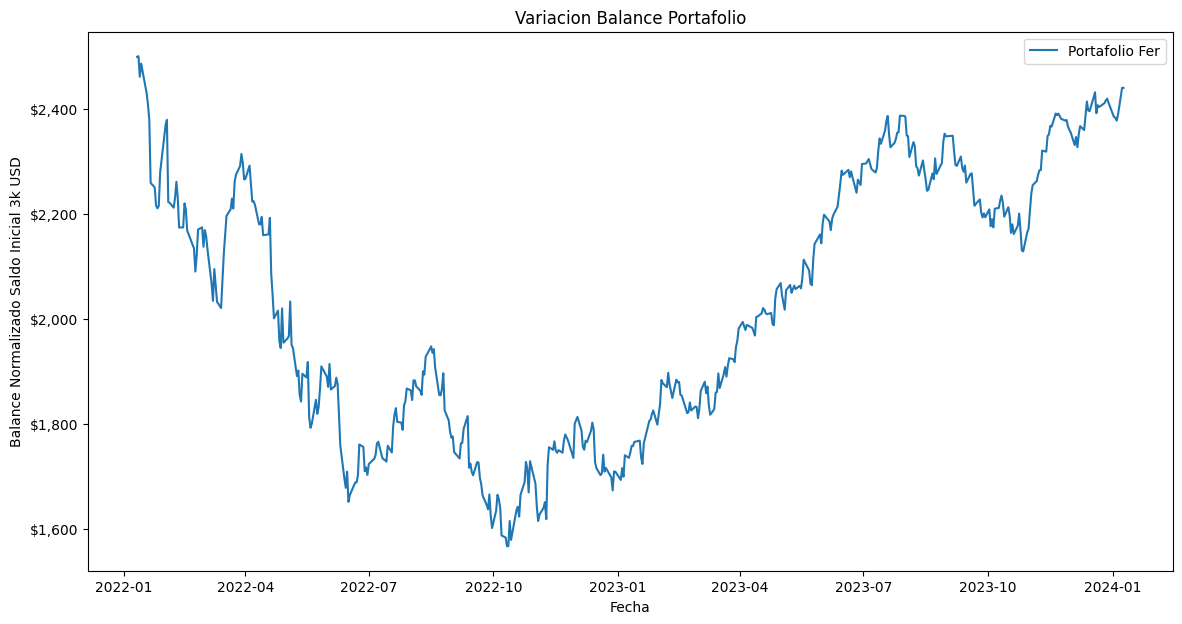

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define los pesos para tres portafolios diferentes
weights_portfolio_1 = np.array(optimal_weights)


# Calcula el balance acumulado para cada portafolio
balance_portfolio_1 = (returns + 1).cumprod().dot(weights_portfolio_1)


# Normaliza los balances al primer día para que comiencen en el mismo punto
normalized_balance_1 = balance_portfolio_1 / balance_portfolio_1.iloc[0]*2500



def money_format(x, pos):
    return '${:,.0f}'.format(x)

# Configurar el formato del eje y
formatter = FuncFormatter(money_format)


# Graficar la comparación de los tres portafolios
plt.figure(figsize=(14, 7))
plt.plot(normalized_balance_1, label='Portafolio Fer')
plt.title('Variacion Balance Portafolio')
plt.xlabel('Fecha')
plt.ylabel('Balance Normalizado Saldo Inicial 3k USD')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()